In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


Reading the file into a PD dataframe

In [78]:
main_df = pd.read_excel('dataset/AmusementPark.xlsx')
main_df.head()

,Obs,is_weekend,num_child,distance,rides,games,wait,clean,overall
0,0,1,0,9.844503,82,64,82,88,68
1,1,0,1,2.720221,85,83,100,90,100
2,2,0,3,1.878189,88,81,80,91,95
3,3,0,0,14.211682,73,52,68,74,55
4,4,0,1,9.362776,78,93,56,82,63


Description of the data 

In [79]:
#describe the data

main_df.drop('Obs', axis = 1).describe()


,is_weekend,num_child,distance,rides,games,wait,clean,overall
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.436000,1.75000,31.583252,80.178000,73.958000,73.320000,85.246000,75.338000
std,0.496384,1.53369,35.766452,6.018868,8.740539,10.696843,5.733693,12.163703
min,0.000000,0.00000,0.640780,64.000000,44.000000,46.000000,65.000000,42.000000
25%,0.000000,0.00000,9.067902,76.000000,68.000000,66.000000,82.000000,67.000000
50%,0.000000,2.00000,19.258191,80.000000,74.000000,73.000000,85.000000,76.000000
75%,1.000000,3.00000,39.011249,84.000000,80.000000,80.000000,89.000000,85.000000
max,1.000000,5.00000,233.295565,99.000000,100.000000,100.000000,100.000000,100.000000


In [80]:
dummy_df = main_df['num_child']

Converting the num_child variable from nominal to binary for each child (child_0, child_1, child_2, etc)

In [81]:
main_df = pd.get_dummies(main_df, columns=['num_child'], prefix='num_child')


,Obs,is_weekend,distance,rides,games,wait,clean,overall,num_child_0,num_child_1,num_child_2,num_child_3,num_child_4,num_child_5
0,0,1,9.844503,82,64,82,88,68,1,0,0,0,0,0
1,1,0,2.720221,85,83,100,90,100,0,1,0,0,0,0
2,2,0,1.878189,88,81,80,91,95,0,0,0,1,0,0
3,3,0,14.211682,73,52,68,74,55,1,0,0,0,0,0
4,4,0,9.362776,78,93,56,82,63,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0,27.246295,73,70,69,80,57,1,0,0,0,0,0
496,496,0,11.953974,74,72,77,79,75,0,0,0,1,0,0
497,497,1,6.766467,81,80,90,82,88,0,0,1,0,0,0
498,498,1,54.541248,81,67,71,82,62,0,0,0,1,0,0


Attaching the original "num_child" column back to the dataframe, since we will need it for interaction effect later

In [82]:
main_df['num_child'] = dummy_df
main_df

,Obs,is_weekend,distance,rides,games,wait,clean,overall,num_child_0,num_child_1,num_child_2,num_child_3,num_child_4,num_child_5,num_child
0,0,1,9.844503,82,64,82,88,68,1,0,0,0,0,0,0
1,1,0,2.720221,85,83,100,90,100,0,1,0,0,0,0,1
2,2,0,1.878189,88,81,80,91,95,0,0,0,1,0,0,3
3,3,0,14.211682,73,52,68,74,55,1,0,0,0,0,0,0
4,4,0,9.362776,78,93,56,82,63,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0,27.246295,73,70,69,80,57,1,0,0,0,0,0,0
496,496,0,11.953974,74,72,77,79,75,0,0,0,1,0,0,3
497,497,1,6.766467,81,80,90,82,88,0,0,1,0,0,0,2
498,498,1,54.541248,81,67,71,82,62,0,0,0,1,0,0,3


Standardizing the data for rides, games, wait, clean and overall

In [83]:
from sklearn import preprocessing

main_df['rides'] = preprocessing.scale(main_df['rides'])
main_df['games'] = preprocessing.scale(main_df['games'])
main_df['wait'] = preprocessing.scale(main_df['wait'])
main_df['clean'] = preprocessing.scale(main_df['clean'])
main_df['overall'] = preprocessing.scale(main_df['overall'])


main_df.head()



,Obs,is_weekend,distance,rides,games,wait,clean,overall,num_child_0,num_child_1,num_child_2,num_child_3,num_child_4,num_child_5,num_child
0,0,1,9.844503,0.303018,-1.140430,0.812267,0.480800,-0.603874,1,0,0,0,0,0,0
1,1,0,2.720221,0.801950,1.035526,2.496692,0.829964,2.029538,0,1,0,0,0,0,1
2,2,0,1.878189,1.300881,0.806478,0.625109,1.004547,1.618067,0,0,0,1,0,0,3
3,3,0,14.211682,-1.193777,-2.514718,-0.497841,-1.963353,-1.673698,1,0,0,0,0,0,0
4,4,0,9.362776,-0.362224,2.180766,-1.620791,-0.566694,-1.015345,0,1,0,0,0,0,1


Creating the correlation matrix to check which variables have the highest correlation between each other and the DV to select the best IVs for the regression model

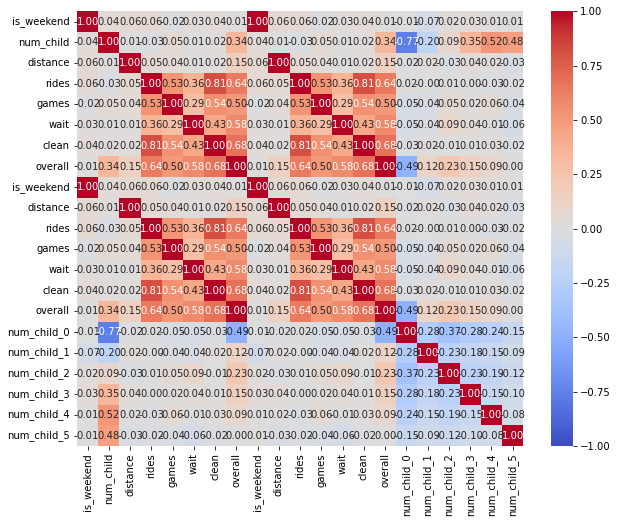

In [36]:
correlation_matrix = main_df.drop(['Obs'], axis = 1).corr()

plt.figure(figsize = (10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt = '.2f',vmax=1, vmin = -1)
plt.show()


In [84]:
main_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Obs          500 non-null    int64  
 1   is_weekend   500 non-null    int64  
 2   distance     500 non-null    float64
 3   rides        500 non-null    float64
 4   games        500 non-null    float64
 5   wait         500 non-null    float64
 6   clean        500 non-null    float64
 7   overall      500 non-null    float64
 8   num_child_0  500 non-null    uint8  
 9   num_child_1  500 non-null    uint8  
 10  num_child_2  500 non-null    uint8  
 11  num_child_3  500 non-null    uint8  
 12  num_child_4  500 non-null    uint8  
 13  num_child_5  500 non-null    uint8  
 14  num_child    500 non-null    int64  
dtypes: float64(6), int64(3), uint8(6)
memory usage: 38.2 KB


Since distance is a skewed distribution, we take a natural log of it to make it a normal curve
Taking the quadratic effect for rides since it creates more significant impact
Testing for interaction between number of children and wait time

In [86]:
main_df['distance_log'] = np.log(main_df['distance'])
main_df['rides_sq'] = main_df['rides'] ** 2
main_df['int'] = main_df['num_child'] * main_df['wait']

# main_df.info()
main_df

,Obs,is_weekend,distance,rides,games,wait,clean,overall,num_child_0,num_child_1,num_child_2,num_child_3,num_child_4,num_child_5,num_child,distance_log,rides_sq,int
0,0,1,9.844503,0.303018,-1.140430,0.812267,0.480800,-0.603874,1,0,0,0,0,0,0,2.286913,0.091820,0.000000
1,1,0,2.720221,0.801950,1.035526,2.496692,0.829964,2.029538,0,1,0,0,0,0,1,1.000713,0.643123,2.496692
2,2,0,1.878189,1.300881,0.806478,0.625109,1.004547,1.618067,0,0,0,1,0,0,3,0.630308,1.692293,1.875326
3,3,0,14.211682,-1.193777,-2.514718,-0.497841,-1.963353,-1.673698,1,0,0,0,0,0,0,2.654064,1.425105,-0.000000
4,4,0,9.362776,-0.362224,2.180766,-1.620791,-0.566694,-1.015345,0,1,0,0,0,0,1,2.236742,0.131207,-1.620791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,495,0,27.246295,-1.193777,-0.453286,-0.404262,-0.915859,-1.509110,1,0,0,0,0,0,0,3.304918,1.425105,-0.000000
496,496,0,11.953974,-1.027467,-0.224238,0.344371,-1.090441,-0.027815,0,0,0,1,0,0,3,2.481064,1.055688,1.033114
497,497,1,6.766467,0.136707,0.691954,1.560900,-0.566694,1.042008,0,0,1,0,0,0,2,1.911979,0.018689,3.121801
498,498,1,54.541248,0.136707,-0.796858,-0.217104,-0.566694,-1.097639,0,0,0,1,0,0,3,3.998957,0.018689,-0.651311


Creating predictors (IV) and target (DV) matrix

In [88]:

predictor, target = main_df[['rides', 'games', 'is_weekend', 'wait', 'clean', 'distance_log', 'num_child_0', 'num_child_1', 'num_child_2', 'num_child_3', 'num_child_4', 'num_child_5', 'int']], main_df['overall']

predictorX = sm.add_constant(predictor) #add constant to account for errors
modelSummary = sm.OLS(target, predictorX)
model_fii = modelSummary.fit() #fit the regression model
model_fii.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                overall   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     187.4
Date:                Fri, 20 Oct 2023   Prob (F-statistic):          9.09e-174
Time:                        19:51:55   Log-Likelihood:                -278.04
No. Observations:                 500   AIC:                             582.1
Df Residuals:                     487   BIC:                             636.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.1163      0.050     -2.310      0.021      -0.215      -0.017
rides            0.2619      0.033      7.897      0.000       0.197       0.327
games            0.0924      0.023      3.934      0.000       0.046       0.139
is_weekend      -0.0480      0.039     -1.234      0.218      -0.124       0.028
wait             0.2516      0.031      8.178      0.000       0.191       0.312
clean            0.2748      0.034      7.984      0.000       0.207       0.342
distance_log     0.0971      0.018      5.368      0.000       0.062       0.133
num_child_0     -0.8445      0.036    -23.252      0.000      -0.916      -0.773
num_child_1      0.1618      0.048      3.381      0.001       0.068       0.256
num_child_2      0.2147      0.040      5.419      0.000       0.137       0.293
num_child_3      0.1680      0.047      3.580      0.000       0.076       0.260
num_child_4      0.0941      0.054      1.752      0.080      -0.011       0.200
num_child_5      0.0896      0.077      1.161      0.246      -0.062       0.241
int              0.0344      0.012      2.831      0.005       0.011       0.058
==============================================================================
Omnibus:                        0.498   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.780   Jarque-Bera (JB):                0.609
Skew:                          -0.035   Prob(JB):                        0.737
Kurtosis:                       2.844   Cond. No.                     1.10e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.51e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

<h2> Getting an R-squared value of 0.82. </h2>
<h4> Variables such as <i>rides </i>, <i>games</i>, <i>wait</i>, <i>clean</i>, <i>distance_log</i>, <i>num_child_1</i>, <i>num_child_2</i>, </i>num_child_3 </i>,<i> interaction between wait and num_child</i> seem to have a significant impact on the overall score.
<br>
Also we notice that <i>num_child_4 </i> and <i>num_child_5 </i> do not have that significant of an impact.
<br>
Moroever, given the r-squre, we can conclude that <b>82.2% </b> of the variance in the DV can be explained by the variables under our consideration </h4>